# Seoul Bike Sharing Demand Prediction

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warning to imporve readability
pd.set_option("display.max_columns", 300) #make every column visible

In [2]:
df = pd.read_csv('Datasets/SeoulBikeData.csv')

In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

## Data Cleaning

Let us split the date into day and month to get more insights. Since the data is collected in one year, I did not included year as our feature.

In [5]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns='Date', axis=1, inplace=True)

In [6]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12


In [7]:
df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Since 'Day' has 31 different values, if we perform feature encoding this feature later on, it will produce extra 30 dummy variables which is a lot, so I decided to discretized it. 

In [8]:
df['Day'].replace(np.arange(1,11,1), 'Early month', inplace=True)
df['Day'].replace(np.arange(11,21,1), 'Mid month', inplace=True)
df['Day'].replace(np.arange(21,32,1), 'Late month', inplace=True)
df['Day'].unique()

array(['Early month', 'Mid month', 'Late month'], dtype=object)

In [9]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

Same goes with 'Hour'.

In [10]:
df['Hour'].replace(np.arange(0,3,1), 'Midnight', inplace=True)
df['Hour'].replace(np.arange(3,6,1), 'Dawn', inplace=True)
df['Hour'].replace(np.arange(6,9,1), 'Sunrise', inplace=True)
df['Hour'].replace(np.arange(9,12,1), 'Morning', inplace=True)
df['Hour'].replace(np.arange(12,15,1), 'Noon', inplace=True)
df['Hour'].replace(np.arange(15,18,1), 'Afternoon', inplace=True)
df['Hour'].replace(np.arange(18,21,1), 'Evening', inplace=True)
df['Hour'].replace(np.arange(21,24,1), 'Night', inplace=True)
df['Hour'].unique()

array(['Midnight', 'Dawn', 'Sunrise', 'Morning', 'Noon', 'Afternoon',
       'Evening', 'Night'], dtype=object)

## EDA

In [11]:
df.describe()

,Rented Bike Count,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


In [12]:
df.dtypes

Rented Bike Count              int64
Hour                          object
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Day                           object
Month                          int64
dtype: object

In [13]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
dtype: int64

In [14]:
y = df['Rented Bike Count']
df_num = df[['Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
df_cat = df[['Day', 'Month', 'Hour','Seasons','Holiday', 'Functioning Day']]

### Label: Target (Rented Bike Count)

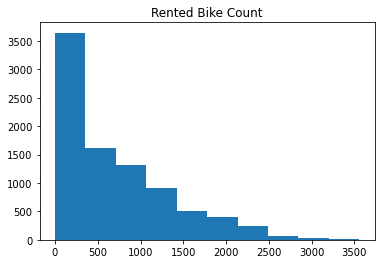

In [15]:
plt.hist(y)
plt.title('Rented Bike Count')
plt.show()

Let's have a look at the overall distribution.

a) For Numeric Data
- Made histograms to understand distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables

b) For Categorical Data

- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survival

### Numeric Data

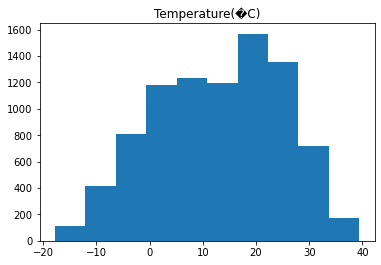

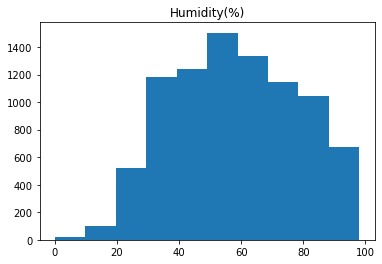

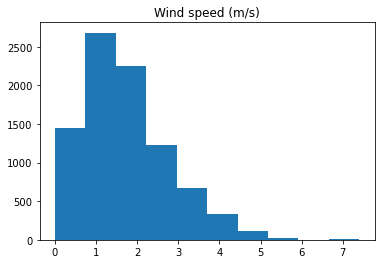

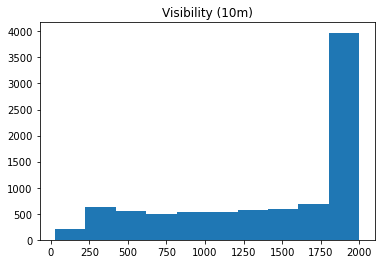

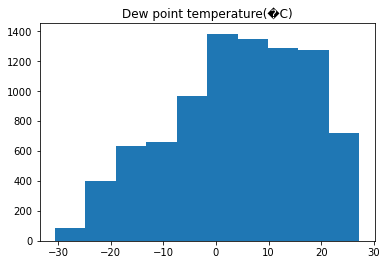

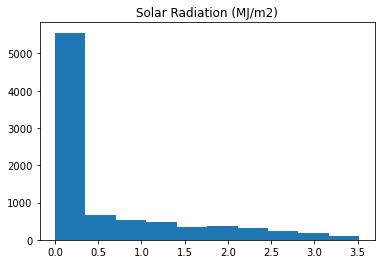

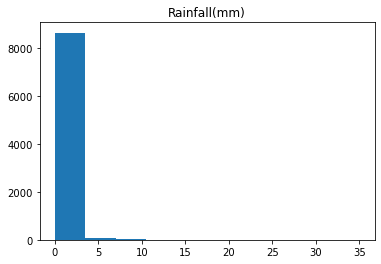

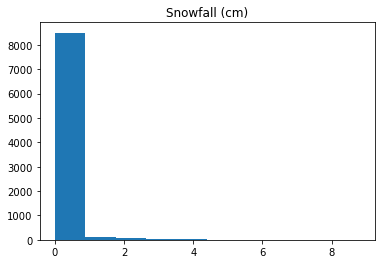

In [16]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

### Categorical Data

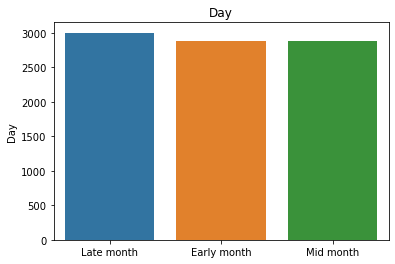

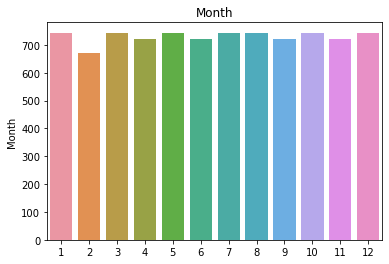

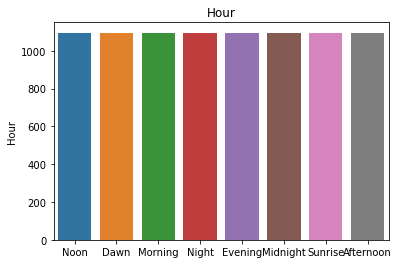

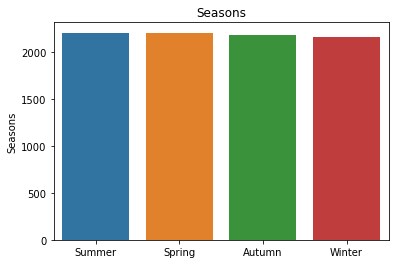

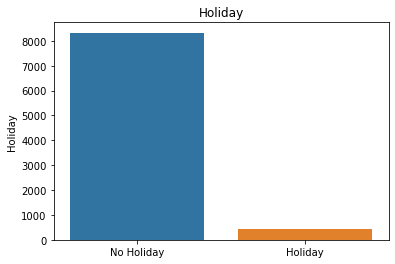

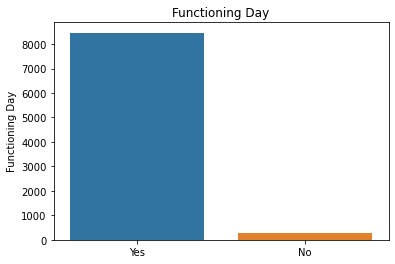

In [17]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

### Overall distribution of the data

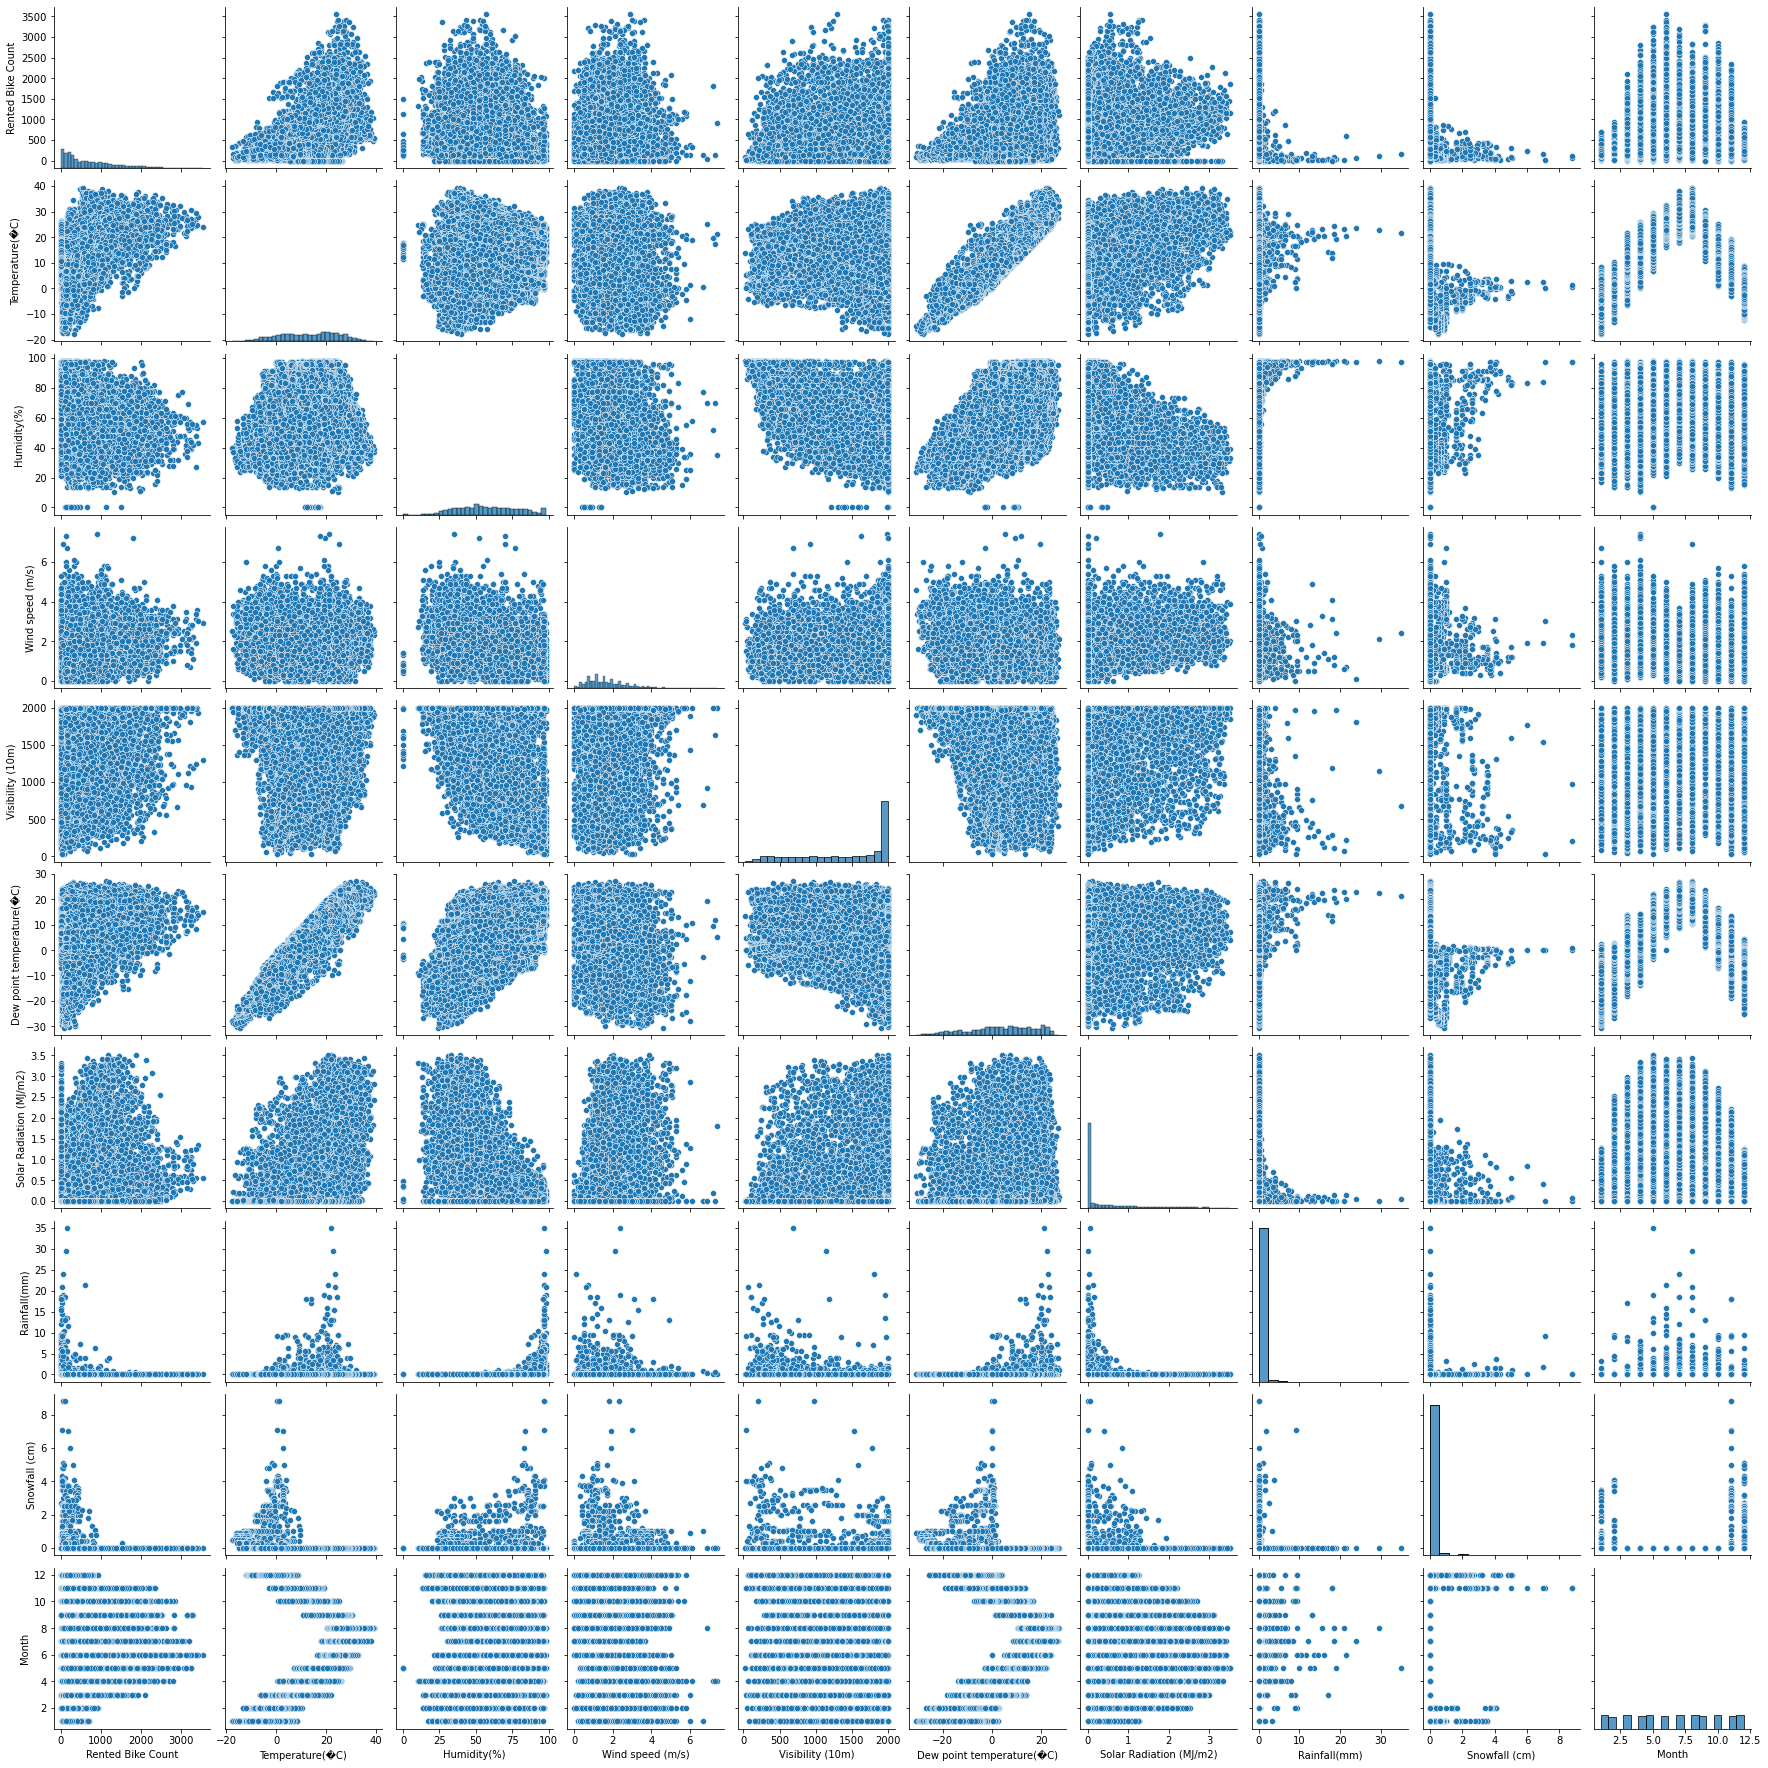

In [18]:
sns.pairplot(df)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns = df_num.columns)
df_num_scaled.head()

,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891


## Feature Encoding

In [20]:
df_cat

,Day,Month,Hour,Seasons,Holiday,Functioning Day
0,Early month,12,Midnight,Winter,No Holiday,Yes
1,Early month,12,Midnight,Winter,No Holiday,Yes
2,Early month,12,Midnight,Winter,No Holiday,Yes
3,Early month,12,Dawn,Winter,No Holiday,Yes
4,Early month,12,Dawn,Winter,No Holiday,Yes
...,...,...,...,...,...,...
8755,Late month,11,Evening,Autumn,No Holiday,Yes
8756,Late month,11,Evening,Autumn,No Holiday,Yes
8757,Late month,11,Night,Autumn,No Holiday,Yes
8758,Late month,11,Night,Autumn,No Holiday,Yes


Since Month is actual kind of associated with Seasons, we will not use Month.

In [21]:
df_nominal = df_cat[['Seasons', 'Day', 'Hour']]
df_binary = df_cat[['Holiday', 'Functioning Day']]

In [22]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [23]:
df_cat_encoded = df_nominal
for col in df_nominal.columns:
    df_cat_encoded = one_hot_encoding(df_cat_encoded, col)
df_cat_encoded.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_Late month,Day_Mid month,Hour_Dawn,Hour_Evening,Hour_Midnight,Hour_Morning,Hour_Night,Hour_Noon,Hour_Sunrise
0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0


In [24]:
df_binary['Holiday'].replace('No Holiday', 0, inplace=True)
df_binary['Holiday'].replace('Holiday', 1, inplace=True)

df_binary['Functioning Day'].replace('No', 0, inplace=True)
df_binary['Functioning Day'].replace('Yes', 1, inplace=True)

In [25]:
df_cat_encoded = pd.concat([df_cat_encoded, df_binary], axis=1)
df_cat_encoded.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_Late month,Day_Mid month,Hour_Dawn,Hour_Evening,Hour_Midnight,Hour_Morning,Hour_Night,Hour_Noon,Hour_Sunrise,Holiday,Functioning Day
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1


## Feature Selection

### i) Removing multicorelated features

<AxesSubplot:>

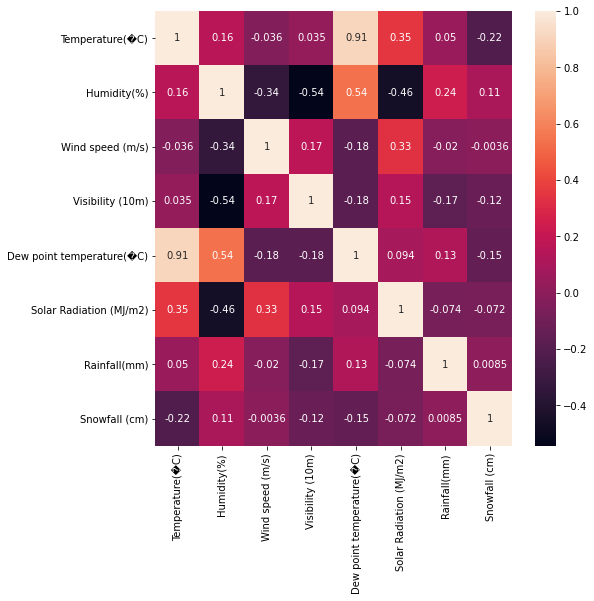

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num_scaled.corr(), annot=True)

In [27]:
df_num_scaled.corr().applymap(lambda x: x if abs(x)>.80 else "")

,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Temperature(�C),1.0,,,,0.912798,,,
Humidity(%),,1.0,,,,,,
Wind speed (m/s),,,1.0,,,,,
Visibility (10m),,,,1.0,,,,
Dew point temperature(�C),0.912798,,,,1.0,,,
Solar Radiation (MJ/m2),,,,,,1.0,,
Rainfall(mm),,,,,,,1.0,
Snowfall (cm),,,,,,,,1.0


In [28]:
df_num_scaled.drop(columns='Dew point temperature(�C)', inplace=True)
df_num_scaled.columns

Index(['Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object')

### ii) Select features with SelectKBest

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X = pd.concat([df_num_scaled, df_cat_encoded], axis=1) # data
y = df['Rented Bike Count'] # target 

kBest = SelectKBest(mutual_info_regression, k = 'all')
kbest_features = kBest.fit_transform(X, y)

<AxesSubplot:xlabel='feature'>

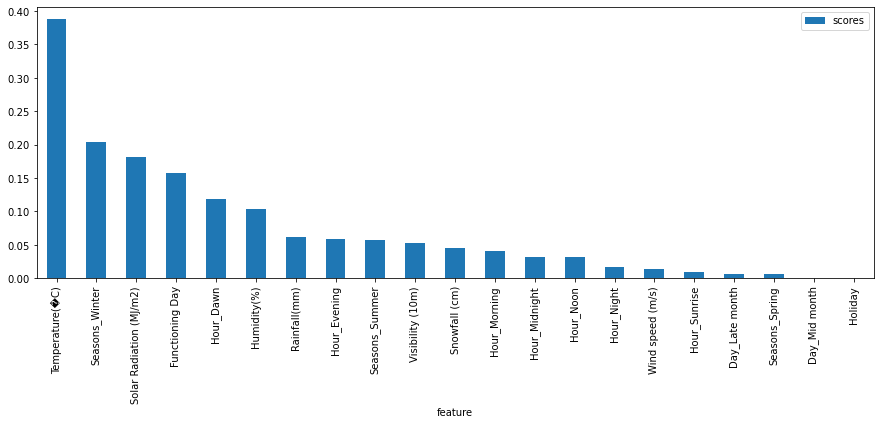

In [30]:
kBest_scores = pd.DataFrame({'feature': X.columns,
                             'scores': np.round(kBest.scores_, 4)})

kBest_scores = kBest_scores.sort_values('scores',ascending=False).set_index('feature')
kBest_scores.plot.bar(figsize=(15,5))

In [31]:
kBest_scores.sort_values(by='scores', ascending=False).applymap(lambda x: x if abs(x)>.02 else "")

,scores
feature,
Temperature(�C),0.3875
Seasons_Winter,0.2043
Solar Radiation (MJ/m2),0.1823
Functioning Day,0.1569
Hour_Dawn,0.1181
Humidity(%),0.1041
Rainfall(mm),0.0616
Hour_Evening,0.0589
Seasons_Summer,0.057


As we can see, day, wind speed, visibility, snowfall and rainfall are not really considered as importance features, so we will drop all of them.

In [32]:
best10 = SelectKBest(mutual_info_regression, k = 14)
X = best10.fit_transform(X, y)

## Data Spilting

We split the dataset into training set and test set. For the spilting ratio, what I normally do is see the size of the dataset. If the dataset is relatively small (n < 10000), 70:30 would be a suitable choice. If the dataset is relatively large, say n > 10000, then choose 80:20. In this case, we have 8760 instances, so we choose to split the dataset into 70% for training and 30% for testing.

In [33]:
from sklearn.model_selection import train_test_split

seed_num = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed_num)

print(X_train.shape)
print(X_test.shape)

(6132, 14)
(2628, 14)


## Basic Model Building(Baseline Validation Performance)

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 10 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set. Also, the performance metrics that I use in this project is RMSE. Then, we will pick 6 best basic models to tune them later on.

In [34]:
from sklearn.model_selection import cross_val_score

def get_cv_score(algo, X_train, y_train):
    
    model = algo.fit(X_train, y_train)
    cv = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
    score = -(cv.mean())
    
    return score

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

In [36]:
lin = LinearRegression(n_jobs=-1)
rid = Ridge(random_state=seed_num)
las = Lasso(random_state=seed_num)
en = ElasticNet(random_state=seed_num)
lars = Lars(random_state=seed_num)
ll = LassoLars(random_state=seed_num)
omp = OrthogonalMatchingPursuit()
br = BayesianRidge()
ard = ARDRegression()
tr = TweedieRegressor()
sgd = SGDRegressor(random_state=seed_num)
par = PassiveAggressiveRegressor(random_state=seed_num)
tsr = TheilSenRegressor(random_state=seed_num, n_jobs=-1)
hr = HuberRegressor()
krr = KernelRidge()
svr = SVR()
nu_svr = NuSVR()
lin_svr = LinearSVR(random_state=seed_num)
knr = KNeighborsRegressor(n_jobs=-1)
pls = PLSRegression()
dtr = DecisionTreeRegressor(random_state=seed_num)
etr = ExtraTreeRegressor(random_state=seed_num)
bag = BaggingRegressor(random_state=seed_num, n_jobs=-1)
rfr = RandomForestRegressor(random_state=seed_num, n_jobs=-1)
etsr = ExtraTreesRegressor(random_state=seed_num, n_jobs=-1)
ada = AdaBoostRegressor(random_state=seed_num)
gbr = GradientBoostingRegressor(random_state=seed_num)
mlp = MLPRegressor(random_state=seed_num)

In [37]:
# Initialize the data frame for stroring the performance of all models later on
basic_models_scores = pd.DataFrame(columns = ['Models', 'RMSE'])

model = [lin, rid, las, en, lars, ll, omp, br, ard, tr, sgd, par, tsr, hr, krr, svr, nu_svr, lin_svr, knr, pls, dtr, etr, bag, rfr, etsr, ada, gbr, mlp]
model_name = [
                'Linear Regression',
                'Ridge Regression',
                'Lasso Regression',
                'Elastic-Net',
                'Least Angle Regression',
                'LARS Lasso',
                'Orthogonal Matching Pursuit(OMP)',
                'Bayesian Ridge Regression',
                'Automatic Relevance Determination Regression',
                'Tweedie Regressor',
                'Stochastic Gradient Descent Regressor',
                'Passive Aggressive Regressor',
                'Theil-Sen Regression',
                'Huber Regressor',
                'Kernel Ridge Regression',
                'Support Vector Regression',
                'Nu Support Vector Regression',
                'Linear Support Vector Regression',
                'k-Nearest Neighbors Regression',
                'Partial Least Squares Regressor',
                'Decision Tree Regressor',
                'Extra Tree Regressor',
                'Bagging Regressor',
                'Random Forest Regressor',
                'Extra TreeS Regressor',
                'Ada Boost Regressor',
                'Gradient Boosting Regressor',
                'Multi-layer Perceptron Regressor'
             ]

In [38]:
i=0
for m in model:
    scores = [get_cv_score(m, X_train, y_train)]
    basic_models_scores.loc[i+1] = [model_name[i]] + scores
    i+=1

In [39]:
basic_models_scores.sort_values(by='RMSE', ascending=True)

,Models,RMSE
24,Random Forest Regressor,287.056618
25,Extra TreeS Regressor,289.401854
23,Bagging Regressor,299.468360
27,Gradient Boosting Regressor,309.100309
19,k-Nearest Neighbors Regression,315.364725
28,Multi-layer Perceptron Regressor,353.978135
21,Decision Tree Regressor,389.526466
22,Extra Tree Regressor,394.511867
9,Automatic Relevance Determination Regression,407.955398
2,Ridge Regression,408.055673


## Model Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Random Forest Regressor

In [41]:
param_grid =  {'n_estimators': [100, 50, 200], 
               'max_depth': [None, 5, 10, 20],
               'max_features': ['auto','sqrt','log2'],
               'min_samples_leaf': [1, 5, 9],
               'min_samples_split': [2, 5, 10]
              }
                                  
reg_rfr_rand = RandomizedSearchCV(rfr, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1, random_state = seed_num, scoring ='neg_root_mean_squared_error')
best_reg_rfr_rand = reg_rfr_rand.fit(X_train, y_train)
best_reg_rfr_rand.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20}

In [42]:
param_grid =  {
               'n_estimators': [200], 
               'max_depth': [20, 17, 15],
               'max_features': ['log2'],
               'min_samples_leaf': [1,2],
               'min_samples_split': [3, 5, 7],
              }

reg_rfr = GridSearchCV(rfr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='neg_root_mean_squared_error')
best_reg_rfr = reg_rfr.fit(X_train, y_train)
best_rfr = best_reg_rfr.best_estimator_
best_reg_rfr.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

### Extra TreeS Regressor

In [43]:
param_grid =  {'n_estimators': [100, 50, 200], 
               'max_depth': [None, 5, 10, 20],
               'max_features': ['auto','sqrt','log2'],
               'min_samples_leaf': [1, 5, 9],
               'min_samples_split': [2, 5, 10]
              }
                                  
reg_etsr_rand = RandomizedSearchCV(etsr, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1, random_state = seed_num, scoring ='neg_root_mean_squared_error')
best_reg_etsr_rand = reg_etsr_rand.fit(X_train, y_train)
best_reg_etsr_rand.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [44]:
param_grid =  {
               'n_estimators': [100], 
               'max_depth': [20, 17, 15],
               'max_features': ['auto'],
               'min_samples_leaf': [1,2],
               'min_samples_split': [7,10],
              }

reg_etsr = GridSearchCV(etsr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='neg_root_mean_squared_error')
best_reg_etsr = reg_etsr.fit(X_train, y_train)
best_etsr = best_reg_etsr.best_estimator_
best_reg_etsr.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

### Bagging Regressor	

In [45]:
param_grid =  {
               'base_estimator': [dtr, rfr, etsr, gbr, knr],
               'n_estimators':[10, 5, 15]
              }

reg_bag = GridSearchCV(bag, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='neg_root_mean_squared_error')
best_reg_bag = reg_bag.fit(X_train, y_train)
best_bag = best_reg_bag.best_estimator_
best_reg_bag.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'base_estimator': RandomForestRegressor(n_jobs=-1, random_state=42),
 'n_estimators': 15}

### Gradient Boosting Regressor

In [46]:
param_grid =  {
                'learning_rate': [0.1, 1, 0.01],
                'n_estimators': [100, 50, 200],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,5,9],
                'max_depth': [3,1,5],
                'tol': [1e-4, 1e-3, 1e-5],
                'max_features': [None, 'auto', 'sqrt', 'log2']
              }

reg_gbr_rand = RandomizedSearchCV(gbr, param_distributions = param_grid, n_iter = 200, cv = 5, verbose = True, n_jobs = -1, random_state = seed_num, scoring ='neg_root_mean_squared_error')
best_reg_gbr_rand = reg_gbr_rand.fit(X_train, y_train)
best_reg_gbr_rand.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'tol': 1e-05,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.1}

In [47]:
param_grid =  {
               'learning_rate': [0.3, 0.1, 0.03],
                'n_estimators': [200],
                'min_samples_split': [3, 5, 7],
                'min_samples_leaf': [7, 9],
                'max_depth': [5, 7],
                'tol': [5e-5, 1e-5, 5e-6],
                'max_features': ['sqrt']
              }

reg_gbr = GridSearchCV(gbr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='neg_root_mean_squared_error')
best_reg_gbr = reg_gbr.fit(X_train, y_train)
best_gbr = best_reg_gbr.best_estimator_
best_reg_gbr.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 200,
 'tol': 5e-05}

### k-Nearest Neighbors Regression	

In [48]:
param_grid = {'n_neighbors' : np.arange(1,20,1),
              'p' : [2,1],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [30, 15, 60]
             }

reg_knr = GridSearchCV(knr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='neg_root_mean_squared_error')
best_reg_knr = reg_knr.fit(X_train, y_train)
best_knr = best_reg_knr.best_estimator_
best_reg_knr.best_params_

Fitting 5 folds for each of 912 candidates, totalling 4560 fits


{'algorithm': 'auto',
 'leaf_size': 15,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

## Model Selection

In [49]:
from sklearn import metrics
import math

def get_performance(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(abs(mse))
    r2 = metrics.r2_score(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    
    row = [mae, mse, rmse, r2, mape]
    return row

In [50]:
tuned_models_performance = pd.DataFrame(columns = ['Models', 'MAE', 'MSE', 'RMSE', 'R2', 'MAPE'])
tuned_model = [best_rfr, best_etsr, best_bag, best_gbr, best_knr]
tuned_model_name = [
                    'Random Forest Regressor',
                    'Extra TreeS Regressor',
                    'Bagging Regressor', 
                    'Gradient Boosting Regressor',
                    'k-Nearest Neighbors Regression'              
                    ]

In [51]:
i=0
for m in tuned_model:
    scores = get_performance(m, X_train, y_train, X_test, y_test)
    tuned_models_performance.loc[i+1] = [tuned_model_name[i]] + scores
    i+=1

In [52]:
tuned_models_performance.sort_values(by='RMSE', ascending=True)

,Models,MAE,MSE,RMSE,R2,MAPE
2,Extra TreeS Regressor,177.046022,75004.134261,273.868827,0.816969,1.761549e+14
1,Random Forest Regressor,178.882671,75213.350416,274.250525,0.816459,1.079316e+16
3,Bagging Regressor,177.939910,76346.441997,276.308599,0.813694,3.781542e+15
4,Gradient Boosting Regressor,183.580366,78752.418976,280.628614,0.807823,7.585470e+15
5,k-Nearest Neighbors Regression,195.206939,87069.968123,295.076207,0.787525,2.527044e+16


In [53]:
best_model = best_etsr

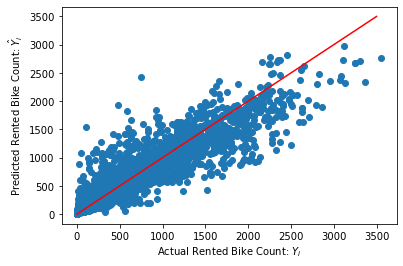

In [54]:
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
x = np.linspace(0, 3500, 100)
y = x

plt.xlabel('Actual Rented Bike Count: $Y_i$')
plt.ylabel('Predicted Rented Bike Count: $\hat{Y}_i$')
plt.plot(x, y, 'r')

## Data Pickling

In [57]:
import pickle
pickle.dump(best_model, open('SeoulBike_best_model.pkl','wb'))